<h1><center>Algorithm: Merge Sort</center></h1>
### Motivation:

* Good introduction to ***divide and conquer*** techniques
* Works recursively by splitting array
* Asserting that it works better than insertion sort, selection sort, or bubble sort

### Big-picture Example:
* **Input:** Array of n numbers, sorted

* **Output:** Same numbers, sorted in increasing order

![Merge Sort Example](images/merge_sort_1.png)

***
## Pseudocode for Merge
***Motivation***: Pseudocode for merger portion of merge sort - ignoring recursive portion

In [ ]:
C = output [length = n]  
A = 1st sorted array [n/2]  
B = 2nd sorted array [n/2]  
i, j = 0,0

In [ ]:
for k = 1 to n:  
    if A(i) < B(j):  
        C(k) = A(i)  
        i++
    else: #B(j) < A(i)
        C(k) = B(j)
        j++

**Note**: This ignores end cases (what happens if subarrays are different lengths, for example

***
## Merge Sort Running Time Analysis
***Motivation***: Running time of merge sort on an array of *n* numbers


### Merge Step

1. From psudeocode above, each pass through the `for` loop has roughly 6 operations

2. The `for` loop will execute *n* times (where *n* is the length of the array)


* **Upshot**: Total number of operations is *6n*



### Recursive Steps

1. The depth of the recursion tree is $log_2n+1$   
    ***Note***: This is the number of levels. There is the initial case *n* followed by $\log_2n$ recurses


2. At each level of the recursion tree there are $2^j$ subproblems each with size $n / 2^j$ 


3. Total operations per level: $$2^j * 6(n/2^j) => 6n$$


4. Total operations overall is then (worst-case):

$$6n(log_2n +1) => 6n log_2 n + 6n$$

***
## Guiding Principles for Algorithm Analysis

### 1) Worst-case Analysis
***Idea***: Our running time bound holds for every input of length *n*

* This is particularly appropriate for "general-pupose" routines


### 2) Lower-order Terms
***Idea***: We won't pay much attention to constant factors and lower order terms


**Justifications**:
1. It's just easier says Tim
2. Constants depend greatly on architecture - compiler/programmer/etc
3. Lose very little predictive power


### 3) Asymptotic Analysis
***Idea***: Focus on running time for large input sizes n - reaching an asymptotic value

**Example**: 
* $6n log_2n + 6n$ is "better than" $1/2 n^2$ - but really, it's only better for sufficiently large *n*


* At smaller values of *n*, it really doesn't matter what algorithm you use

### What's the goal?
***Holy Grail***: Linear running time or something close to it (i.e. $O(n)$)

***
# <center>Concept: Asymptotic Analysis ("Big-Oh")</center>

### Motivation

1. Vocabulary for the design and analysis of algorithms  
    * "Big-oh" notation
    
    
2. "Sweet spot" for high-level reasoning about algorithms


3. *Coarse* enough to suppress architecture/language/compiler-dependent details.


4. *Sharp* enough to make useful comparisons between different algorithms, especially on large inputs (e.g. sorting functions, or integer multiplication)


**High-level Idea**: Suppress constant factors and lower-order terms

***
### Example (from previous)
We can equate the following:

$$6n log_2n + 6n => n log  n$$

Meaning the running time is 

$$O(n log  n)$$




***
## Asymptotic Analysis Examples

### Example 1 - One Loop

In [ ]:
# Given 1 array A
for i in range(len(A)):
    if A[i] == t:
        # do something

***Maximum number or lines run***: n

***Analysis***: $O(n)$ - linear time

### Example 2 - Two Loops

In [ ]:
# Give 2 arrays A, length n and B, length m
for i in range(len(A)):
    if A[i] == t:
        # do something 
        
for i in range(len(B)):
    if B[i] == t:
        # do something else

***Maximum number or lines run***: n*m

***Analysis***: $O(nm) => O(n)$ - linear time

### Example 3 - Two Nested Loops

In [ ]:
# Given arrays A and B of length n
for i = 1 to n:
    for j = 1 to n:
        if A[i] == A[j] return True
return False

***Maximum number or lines run***: $n^2$

***Analysis***: $O(n^2)$ - quadratic time

### Example - Two Nested Loops (II)

In [ ]:
# Given an array A of length n
for i = 1 to n:
    for j = i + l to n:
        if A[i] == A[j] return True
return False

***Maximum number or lines run***: $1/2 *n(n - 1)$

***Analysis***: $O(n^2)$ - quadratic time (ignoring constants/lower-order terms)

***
## Big-Oh Notation
<br></br>
***English Definition***
 * **Q**: When is $T(n) = O(f(n))$
 
 * **A**: If, eventually (for sufficiently large n), $T(n)$ is bounded above by a constant multiple of $f(n)$
 
<br></br>
 ***Formal Definition***: $T(n) = O(f(n))$ if and only if there exist constants $c, n_0 > 0$ such that:
 
 $$T(n) <= c * f(n)$$ for all $$n >= n_0$$
 
**Note**: $c, n_0$ cannot depend on n
 
**Another Note**: To prove a function is $O(f(n))$ ***all*** you need to do is find a single case of c and $n_0$ that satisfies the requirements

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0,0.5,'Number of operations')

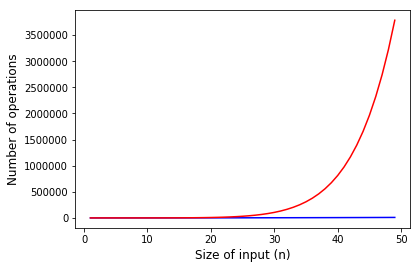

In [20]:
n = np.array(range(1, 50))
plt.plot(n, np.square(n)*np.log(n), c='blue')
plt.plot(n, n**(np.log(n)), c='red')
plt.xlabel('Size of input (n)', fontsize=12)
plt.ylabel('Number of operations', fontsize=12)